# Diferencias finitas
- Óscar Alvarado

El método de diferencias finitas es una manera de discretizar una derivada tal y como se conoce de la definición de cálculo diferencial. Existen tres maneras de representar este modelo: **Hacia adelante**, **Hacia atrás** y **Centrado**, tal y como se muestra en la figura mostradaa continuación. Entonces, computacionalmente se reduce el tamañano de *h* tanto como se pueda y poder obtener la pendiente de la curva en cierto punto. Este método se utiliza para discretizar derivadas de cualquier orden y de varias variables.

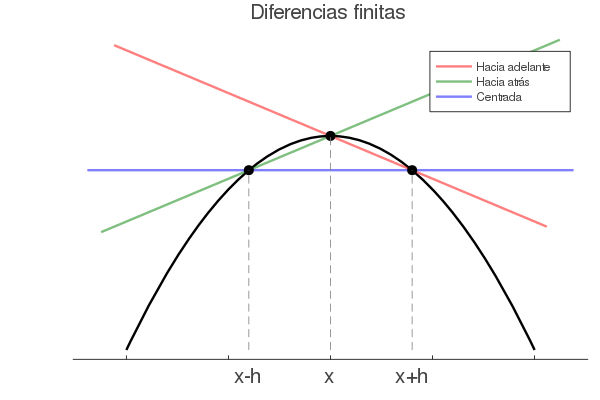

In [153]:
display("image/png", read("Diferencias_finitas.png"))

In [139]:
using LinearAlgebra
using Plots

# 1-D

In [2]:
function FD_Matrix(N, nodos, h, tipo = :F)
    A = zeros(nodos, nodos)
    # Forward
    if tipo == :F 
        v = [((binomial(N, a))*(-1)^a)/(h^N) for a = N:-1:0]
        for i in 0:N
            A += diagm(i => [v[i+1] for j = 1:(nodos-i)])
        end
        return A
    # Backward
    elseif tipo == :B 
        v = [((binomial(N, a))*(-1)^a)/(h^N) for a = 0:N]
        for i in 0:N
            A += diagm(-i => [v[i+1] for j = 1:(nodos-i)])
        end
        return A
    # Central
    elseif tipo == :C
        v = [((binomial(N, a))*(-1)^a)/(h^N) for a = 0:N]
        if (N + 1) % 2 == 0
            for i in (N+1)/2:-1:1
                A += diagm(convert(UInt8, i) => [v[convert(UInt8, ((N+1)/2)-i+1)] for j = 1:(nodos-i)])
                A += diagm(-1*convert(UInt8, i) => [v[convert(UInt8, end - (((N+1)/2)-i))] for j = 1:(nodos-i)])
            end
        else
            for i in 0:N
                A += diagm(i-convert(UInt8, (N/2)) => [v[i+1] for j = 1:(nodos-abs(i-convert(UInt8, (N/2))))])
            end
        end
        return A
    else
        print("No")
    end
end

FD_Matrix (generic function with 2 methods)

## Ecuación de ejercicio:
$$
\dfrac{d^{2}u}{dx^{2}} + \dfrac{1}{x}\dfrac{du}{dx} - \dfrac{u}{x^2} = 0,
$$

con condiciones iniciales $u(2) = 0.008$, $u(6.5) = 0.003$ y 4 nodos (rejilla de 3 espacios).

In [23]:
function Ejercicio1_1(n, inicio, final, b)
    h = (final-inicio)/(n-1) # Tamaño del intervalo sobre el eje x
    x = inicio:h:final
    
    non_zeros = findall(!iszero, b)
    inverse = [1/i for i in x]
    
    for i in non_zeros
        inverse[i] = 0
    end
    A = FD_Matrix(2, n, h, :F) + Diagonal(inverse) * FD_Matrix(1, n, h, :F) - Diagonal(inverse .^ 2 )
    
    A[non_zeros, :] = zeros(length(non_zeros), size(A)[1])
    
    for j in non_zeros
        A[j, j] = 1
    end

    sol = A \ b
    
    return x, sol
end   

Ejercicio1_1 (generic function with 1 method)

In [28]:
# Condiciones iniciales
n = 8 # Número de nodos
inicio, final = 2, 6.5 # Extremos del intervalo
b = zeros(n)
b[1] = 0.008
b[end] = 0.003

0.003

## Condiciones iniciales

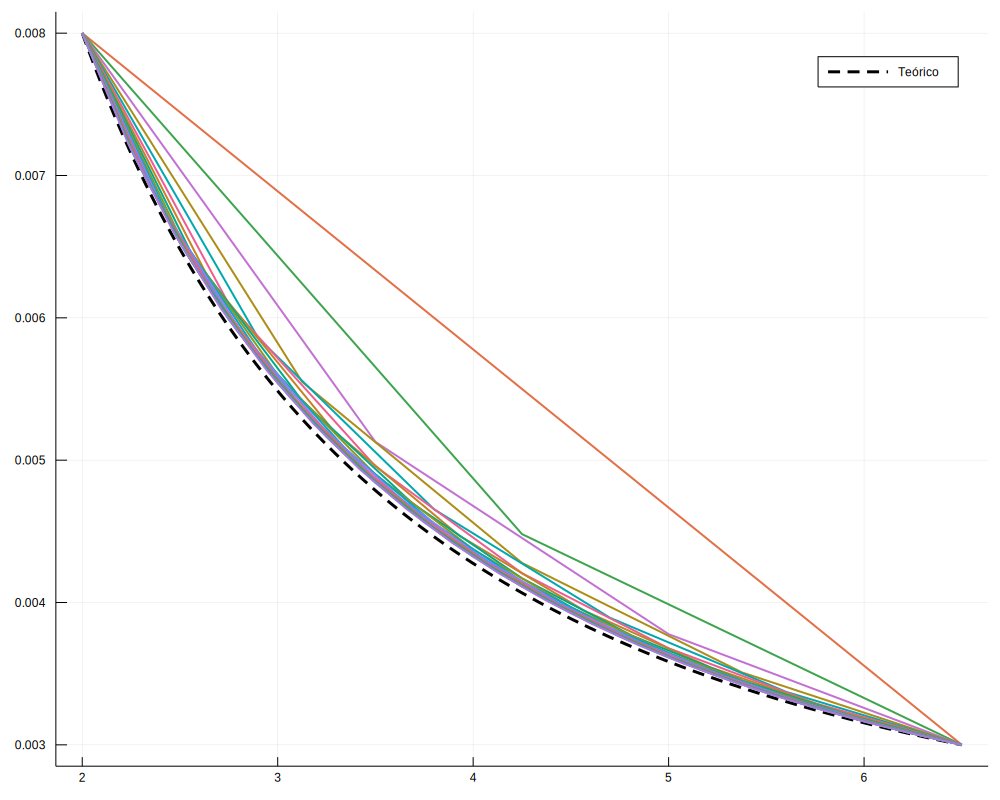

In [22]:
n = 155 # Número de nodos
inicio, final = 2, 6.5 # Extremos del intervalo
b = zeros(n)
b[1] = 0.008
b[end] = 0.003

u(x) = 9.15033*10^(-5)*x + (0.015634./x)
x, y = Ejercicio1_1(n, inicio, final, b)
p = plot(x, u(x), lw = 3, linestyle = :dash, color = :black, lab = "Teórico")
for i in 2:20
    b = zeros(i)
    b[1] = 0.008
    b[end] = 0.003
    plot!(p, Ejercicio1_1(i, inicio, final, b), lw = 2, lab = false)#"Rendijas: $i")
end
plot!(size=(1000, 800))

# 2-D